Final RMSE: 7.332915607584343


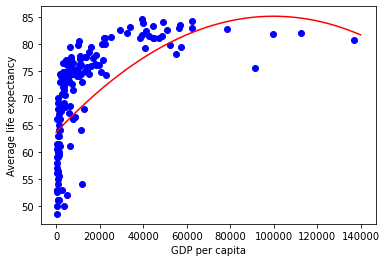

In [5]:
# To be able to process polynomials of any complexity,
# it is advisable to store the coefficients k0, k1 ... kn of a polynomial in a vector.
# Generate random coefficients for about 10000 different 2nd order polynomials
# and visualize the polynomial which best approximates the data (has the lowest RMSE value).
# Find meaningful ranges for the randomly generated coefficients (e.g. k0 between 0 and 100,
# k1 between -0.00001 and +0.00001, k2 between -0.00000001 and +0.00000001).

# Import external libraries
import matplotlib.pyplot as plt
import math
import numpy as np
import random

# Enable inline plotting
%matplotlib inline

# Import the CSV file
nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True)

# Label graph plot
plt.xlabel("GDP per capita")
plt.ylabel("Average life expectancy")

# Calculate GDP per capita for each country
gdp = nations[:,3] * 1000000
gdppc = gdp

for i in range(len(gdp)):
    gdppc[i] = gdp[i] / nations[i, 6]

# Plot average life expectancy over GPD per capita
plt.plot(gdppc, nations[:,4], "ob")

# Approximate relation with polinomial
gdppcVector = np.expand_dims(gdppc, axis=0)
exponentsVector = np.expand_dims(np.arange(0,3), axis=1)
gdppcToThePowerOfExponentMatrix = np.power(gdppcVector, exponentsVector)

# Find polynomial with lowest rmse
smallestRMSE = 1000
bestCoefficients = []

# Try 10000 different random coefficients to find best ones
for j in range(10000):
    # Generate random coefficients
    coefficients = np.expand_dims(np.array([random.uniform(0, 100),
                                            random.uniform(-0.001, 0.001),
                                            random.uniform(-0.000001, 0.000001)]),
                                  axis=1)
    
    #Calculate approximated life expectancy values with 2nd order polynomial
    lifeExpectancyPolynomialApproximation = np.matmul(gdppcToThePowerOfExponentMatrix.transpose(), coefficients)
    lifeExpectancyPolynomialApproximation = np.squeeze(lifeExpectancyPolynomialApproximation)

    # Calculate and output RMSE value
    squareErrorSum = np.sum(np.power(lifeExpectancyPolynomialApproximation - nations[:, 4], 2))

    mse = squareErrorSum / len(nations[:,4])

    rmse = math.sqrt(mse)
    
    # Check if current RMSE is the smallest
    if(rmse < smallestRMSE):
        smallestRMSE = rmse
        bestCoefficients = coefficients

# Print final RMSE value
print("Final RMSE: {}".format(smallestRMSE))

# Make bestCoefficients an array
bestCoefficients = np.squeeze(bestCoefficients)

# Return y value for polynomial with provided coefficients
def polynomialFunction(x, coefficients):
    y = 0
    for e in range(len(coefficients)):
        y = y + coefficients[e] * np.power(x, e)
    
    return y

# Plotting the polynomial approximation
xValues = np.arange(0.0, 140000.0, 100.0)
plt.plot(xValues, polynomialFunction(xValues, bestCoefficients), color = "red")